<a href="https://colab.research.google.com/github/sebitas/3dBasicRunner/blob/master/VOLUMEN_HORA_VS_PRECIO_PROMEDIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprovecha al máximo tu suscripción a Colab



[*********************100%%**********************]  1 of 1 completed


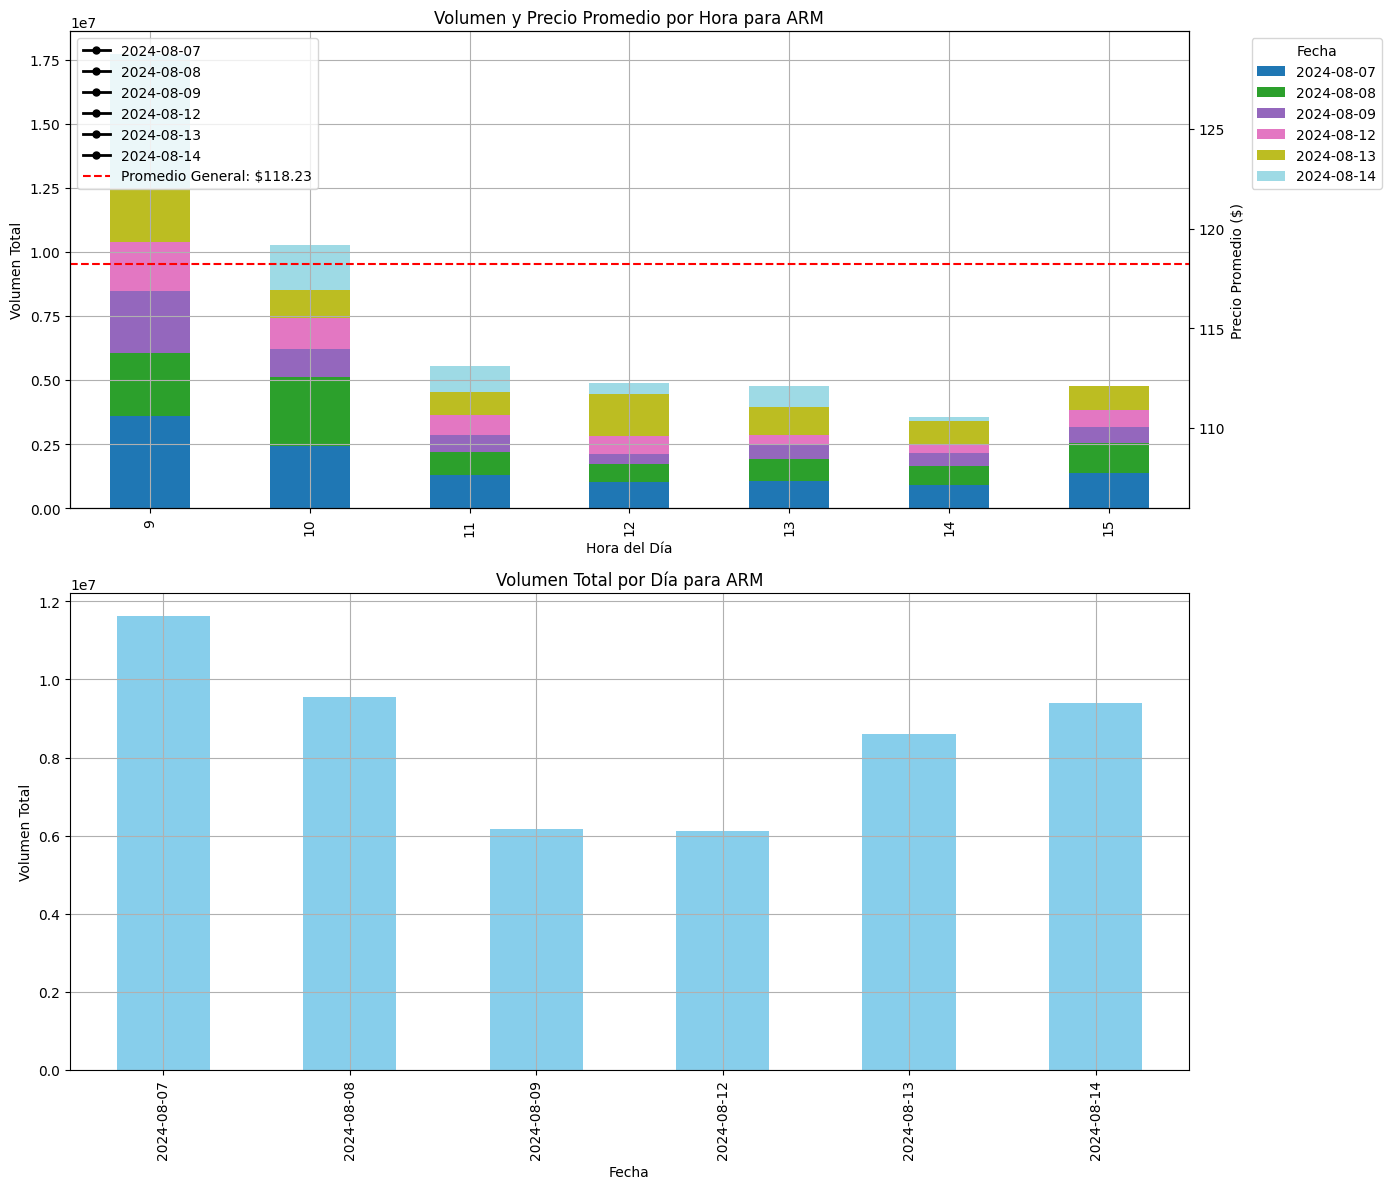

In [62]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Descargar datos históricos de la acción
ticker = "ARM"  # Cambia esto por el ticker de la acción que deseas analizar
data = yf.download(ticker, start="2024-08-07", end="2024-08-15", interval="60m")  # Datos por hora

# Asegurarse de que el índice esté en formato datetime
data.index = pd.to_datetime(data.index)

# Filtrar los días en los que hubo cotización (es decir, donde el volumen no es cero)
data = data[data['Volume'] > 0]

# Crear nuevas columnas para la hora y el día
data['Hour'] = data.index.hour
data['Date'] = data.index.date

# Agrupar por día y hora, y calcular el volumen total y el precio promedio por hora
volume_per_hour = data.groupby(['Hour', 'Date'])['Volume'].sum().unstack(level=1)
price_per_hour = data.groupby(['Hour', 'Date'])['Close'].mean().unstack(level=1)

# Crear una figura con dos subgráficas
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(14, 12))

# Graficar el volumen por hora como barras apiladas en la primera subgráfica
volume_per_hour.plot(kind='bar', stacked=True, ax=ax1, colormap='tab20')
ax1.set_xlabel('Hora del Día')
ax1.set_ylabel('Volumen Total')
ax1.set_title(f'Volumen y Precio Promedio por Hora para {ticker}')
ax1.grid(True)
ax1.legend(title="Fecha", bbox_to_anchor=(1.05, 1), loc='upper left')

# Crear un segundo eje Y para el precio en la misma subgráfica
ax2 = ax1.twinx()
price_per_hour.plot(ax=ax2, color='black', marker='o', linestyle='-', linewidth=2, markersize=5)
ax2.set_ylabel('Precio Promedio ($)')
ax2.legend(title="Precio Promedio", bbox_to_anchor=(1.05, 0.6), loc='upper left')

# Añadir una línea horizontal con el precio promedio general para referencia
average_price = price_per_hour.stack().mean()
ax2.axhline(y=average_price, color='red', linestyle='--', label=f'Promedio General: ${average_price:.2f}')
ax2.legend(loc='upper left')

# Calcular el volumen total por día
volume_per_day = data.groupby('Date')['Volume'].sum()

# Graficar el volumen total por día en la segunda subgráfica
volume_per_day.plot(kind='bar', ax=ax3, color='skyblue')
ax3.set_xlabel('Fecha')
ax3.set_ylabel('Volumen Total')
ax3.set_title(f'Volumen Total por Día para {ticker}')
ax3.grid(True)

plt.tight_layout()
plt.show()
